# Probabilistic Linear Discriminant Analysis for Inferences About Identity
 

# 2 Probabilistic LDA (PLDA)
  
LDA 模型建模了 数据的 类内方差, 类间方差, 进而找到了一个最佳的特征空间映射方向, 得到最好的区分特征, 然后进行分类.
PLDA , 是LDA的概率方法, 实际上和 LDA 虽然相差深远, 但是还是很有关系的, LDA - PLDA  就类似与  PCA - FA.  
对一个样本 $x_{ij}$, 我们建模其生成过程为:  

$$ x_{ij} = \mu + F h_i + G w_{ij} + \epsilon_{ij}\tag{1} $$

i $\mu + F h_i $ **建模 类间识别信息, 第i类的识别信息. 所有i类样本具有的相同信息.**  
ii $ G w_{ij} + \epsilon_{ij} $ **建模 类内区分信息, i类内 j 个样本之间的不相同点($\epsilon$包含噪声)**  


$ \mu $ 代表train data的均值    
$ F $  的列向量 代表类间区分信息子空间的基(构成类间信息子空间)  
$ F $  可以粗略的对应 LDA的类间协方差矩阵的特征向量.  
$ h_i $ 描述一个类在 区分信息子空间的向量  
$ G $ 包含类内信息子空间的基(构成类内信息子空间)  
$ G $  可以粗略的对应 LDA的类内协方差矩阵的特征向量.  
$ w_{ij} $ 描述类内样本在 类内信息空间的向量.  
$ \epsilon_{ij} $ 描述 剩余下来的 不可解释的噪声信息, 以 0 为均值, 对角矩阵 $\Sigma $为 协方差矩阵  

最终参数集合为:  
$$ \theta = \{\mu, F, G, \Sigma \} $$ 

公式化 模型(1): 
$$ P(x_{ij} | h_i, w_{ij}, \theta) = G_x[\mu + F h_i + G w_{ij}, \Sigma]\tag{2} $$

在贝叶斯概率框架下, 定义$h_i$ $w_{ij}$的先验概率为(3)(4):  
$$ P(h_{i}) = G_h[0, I]\tag{3} $$
$$ P(w_{ij}) = G_w[0, I]\tag{4} $$

PLDA 分为两个阶段:  
1 训练阶段: 训练得到 $ \theta = \{\mu, F, G, \Sigma \} $
2 识别阶段: 使用$\theta$ 对某个x 进行与目标taget的x进行匹配比较.  
  
  
  
## 2.1 训练
从训练集$x_{ij}$ 下拟合出最佳的 $ \theta = \{\mu, F, G, \Sigma \} $, 在隐变量框架下, 如果知道了 $h_i$ $w_{ij}$ 可以很容易估计出 $\theta$ , 但是不幸的是 我们不知道 隐变量.  
幸运的是可以使用 EM算法, 坐标下降方法, 对 $\theta$ 进行估计.  

E-Step:  
我们先固定 $\theta$ , 估计 $h_i$ $w_{ij}$ 的后验概率, 以 隐变量期望为 隐变量值.   
M-Step:  
根据当前迭代的隐变量值, 来更新 $\theta$.  



## 2.2 识别
PLDA 的匹配识别, 是计算不同匹配测试情况的似然比, 似然比最高测试的目标就是 x 的target. 

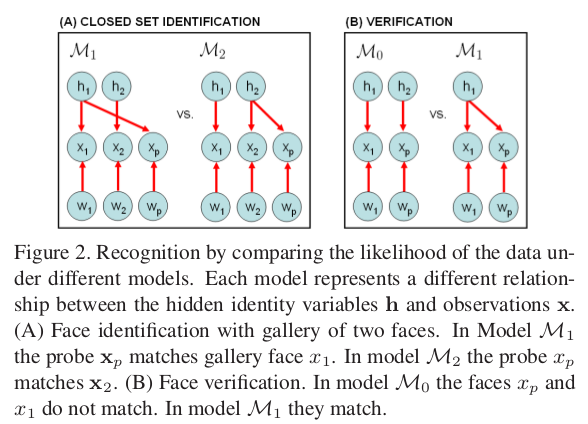

计算x 在多个匹配模型 $ M_R $ 下的似然值, 匹配模型下具有匹配测试, 分为两种情况:  
1 如果x 和 target是同一类, 那么 x target, 就具有相同的类间识别信息 $h_i$  
2 如果不同类, 则具有不同的 类间识别信息 $h_x$ $h_target$  

一个匹配模型计算的是　所有ｘ的似然函数．(如果两个观测x 具有相同的$h_i$, 那么使用目标的$h_1$ 作为 $h_{test}$)计算似然函数.

eg: 在图A中, 描述了两个模型 $M_1$ $M_2$  , 以$M_1$为例:  
$M_1$ 描述的是 $x_p$ 和 $x_1$ 相匹配, 具有相同的识别信息$h_1$, 而 $x_2$ 具有自己的识别信息　$h_2$ ,  
这样匹配模型$P(X| M_1)$为
$$  P(X| M_1)  =  P(X_{1, 2, p} | M_1 ) $$  

$$  P(X_{1, 2, p} | M_1) = P(X_{1, p}|M_1) P(X_2 | M_1)\tag{6} $$  


选择一个最大后验概率的模型 $M_q$, 

$$ P(M_q| X) = \frac{P(X|M_q) P(M_q)}{\sum\limits_{r=0}^{R} P(X|M_r) P(M_r)} $$

分解其中的条件概率为:  

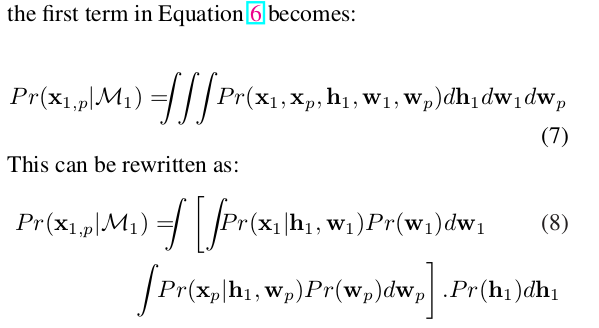
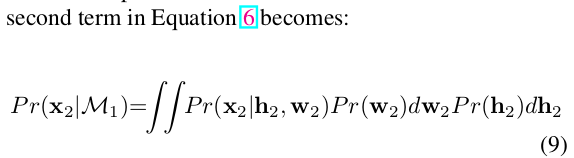


上面式子中的条件概率, 都在(2)(3)(4)中有定义.  
模型2 $M_2$ 的概率, 和上面的分解相同.


边缘化的的有意思的副作用是, 可以有效的比较不同数量的 隐变量$h$, 这是十分有用的, 考虑验证情况B, 我们比较模型$M_0$(两个x不匹配, 具有不同的$h$) 和 $M_1$(两个x匹配, 只有一个相同的$h$)
PLDA是高斯噪声, 因此可以 同时包含公式(8)(9)进行积分, 一般情况下, 问题是计算似然函数值, N个样本具有相同隐变量$h$, 不同的类内识别信息$w_1, w_2... w_N$, 对于高斯概率的PLDA   
**计算多个x属于同一个类的似然概率, 可以被组合构建为**  
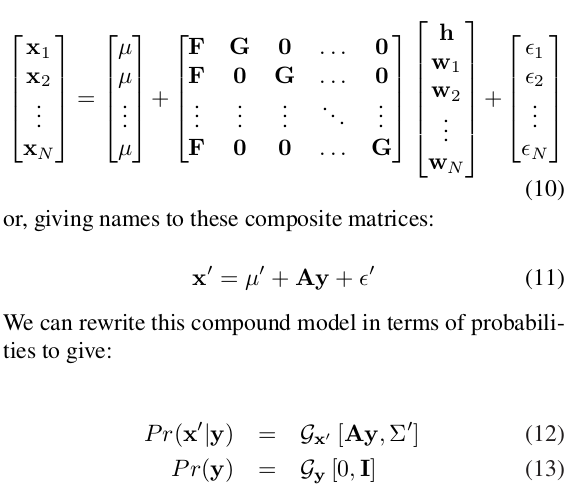

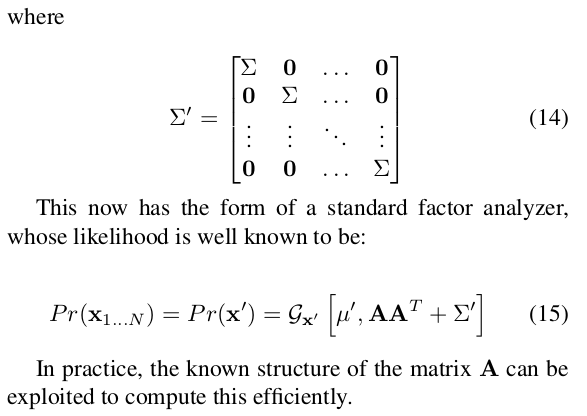









## 2.3 Appendix 1: Learning PLDA Models

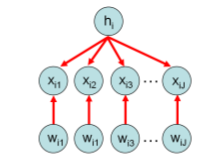
E-Step:  
同时估计 一个类i的所有j个样本的 J + 1个隐变量 $h_i$ $w_{i1} w_{i2} w{iJ}$, 可以组合类i的所有样本$\{ x_{i1}, ... x_{iJ}\}$的生成公式, 得到相关的 似然函数 和 先验概率:  　　

$$ P(x_i | y_i, \theta) = G_x[A y_i, \Sigma^{'}]\tag{19} $$  
$$ P(y_i) = G_y[0, I] \tag{20}$$  
A, $y_i$ , $\Sigma^{'}$ 按照　(11)(13)(14)定义, 在上面(19)(20)定义的公式,　构成了因子分析模型．  
  
  
首先估计　隐变量后验概率:    
  
$$ P(y_i| x_i, \theta) \propto P(x_i|y_i, \theta) P(y_i) $$  

因为右侧两个部分都是高斯分布，　左侧的后验概率也一定是高斯分布，　因此得到隐变量期望为:  
  
$$ E[ｙ_i] = (A^T \Sigma^{'-1}A +I)^{-1})A^T\Sigma^{'-1}(x_i - \mu^{'}) \tag{22} $$  
$$ E[y_i y_i^T] = (A^T \Sigma^{'-1}A +I)^{-1}A^T\Sigma^{'-1})^{-1} + E[y_i]E[y_i]^T $$  


M-Step:  
经过E-Step: 求解得到了 $y_i$的后验概率之后，利用$y_i$后验概率以及后验期望$E[y_i]$　更新$\theta={\mu, F, G, \Sigma}$  

重写模型为：　　
![Screenshot%20from%202018-06-26%2014-52-34.png](attachment:Screenshot%20from%202018-06-26%2014-52-34.png)

Ｂ是ＦＧ的组合矩阵，$z_{ij}$是隐变量的组合隐变量,   
最大化是我们最大化辅助函数(全数据对隐变量的后验期望):  
$$ Q(\theta_{t}, \theta_{t-1} ) = \\
    \sum\limits_{i=1}^{I} \sum\limits_{j=1}^{J} \int P(z_i|x_{i1} ... x_{iJ}) log[P(x_{ij}|z_i)P(z_i)]dz_{i} \tag{26}$$


公式中$x_{ij}$的条件对数可以写为:  
$$ log[P(x_{ij}|z_i)] = K - \frac{1}{2}\Big(log|\Sigma^{-1}| + (x_{ij} - \mu - Bz_i)^T\Sigma^{-1}(x_{ij} - \mu - Bz_i)\Big) \tag{28} $$  
  
将(28) 带入 (26) , 然后求对B和$\Sigma$的导数, 得到如下更新公式:  

1  
$$ \mu = \frac{1}{IJ}\sum_{ij}x_{ij} $$
  
2  
$$ B = \Bigg(\sum_{ij} (x_{ij} - \mu) E[z_i]^T\Bigg) \Bigg(\sum_{ij} E[z_i z_i^T]\Bigg)^{-1} $$  

3  
$$ \Sigma = \frac{1}{2}\sum_{ij}Diag\Big[(x_{ij} - \mu)(x_{ij} - \mu)^T -B E[z_i](x_{ij}-\mu)^T\Big] $$

结果就计算除了 B(F G), 相似度计算, 按照2.2 识别 中的方法进行计算.